In [16]:
import pandas as pd
import numpy as np 
import seaborn as sns
import os

/


In [ ]:
os.chdir("/home/rivlanm/cmu/v2x/v2x-privacy-sim/")

### Exp 1

pb range 0 -> .1

freq 1H

Policy 1

In [14]:
pb_range = np.arange(0.0025,.1,0.0025)

exp_dir = "exp_data/Freq1_Policy1/PB{}_SB0_HB0"

results_arr = []
for pb in pb_range:
    pb = round(pb,4)
    exp = exp_dir.format(pb)
    results_ = pd.read_csv("{}/results.csv".format(exp))
    results_["pb"] = pb
    results_arr.append(results_)



/
exp_data/Freq1_Policy1/PB0.0025_SB0_HB0/results.csv


FileNotFoundError: [Errno 2] No such file or directory: 'exp_data/Freq1_Policy1/PB0.0025_SB0_HB0/results.csv'

<Axes: xlabel='pb', ylabel='recall'>

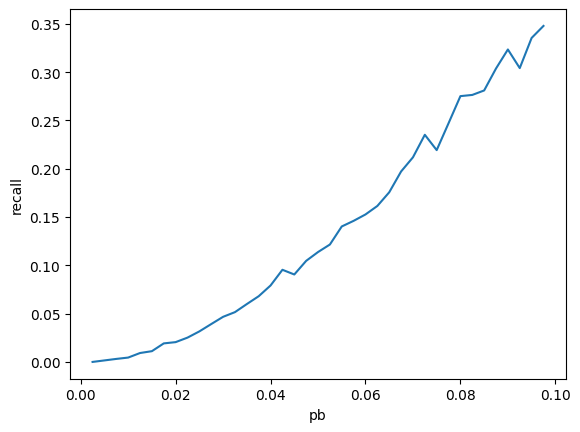

In [ ]:
results = pd.concat(results_arr).reset_index(drop=True)
sns.lineplot(results, x="pb", y="recall")

<Axes: xlabel='pb', ylabel='prec'>

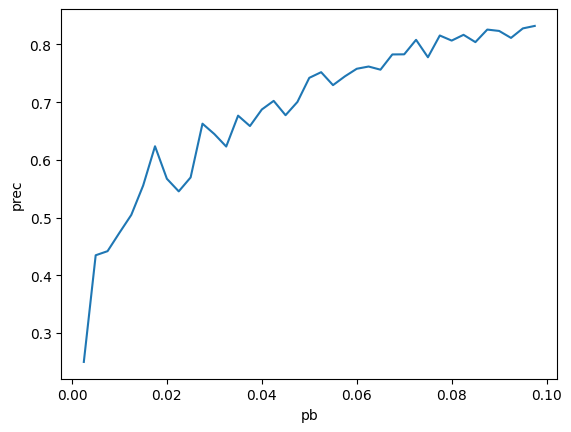

In [ ]:
sns.lineplot(results, x="pb", y="prec")

In [ ]:
pb_range = np.arange(0.0025,.1,0.0025)

exp_dir = "exp_data/Freq1_Policy1/PB{}_SB0_HB0"

posn_arr = []
pb_arr = []
for pb in pb_range:
    pb = round(pb,4)
    exp = exp_dir.format(pb)
    results_ = pd.read_csv("{}/positional_noise.csv".format(exp))
    break
    
    # results_ = np.mean(results_.values)
    # pb_arr.append(pb)
    # posn_arr.append(results_)

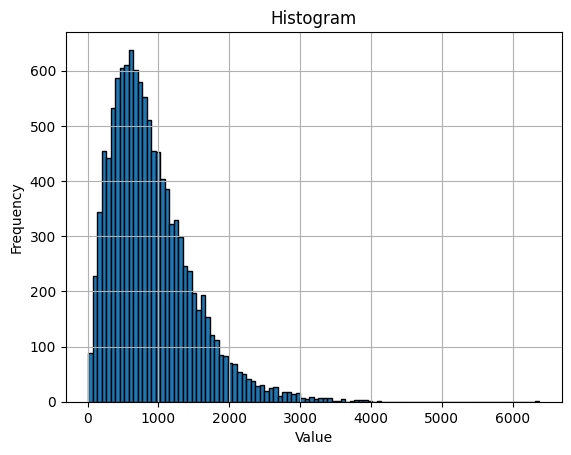

In [ ]:
import matplotlib.pyplot as plt
hist, bins = np.histogram(results_.values, bins=100)  # Adjust the number of bins as needed

# Plot histogram
plt.hist(results_.values, bins=bins, edgecolor='black')
plt.title('Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
np.mean(results_.values)

899.1822164905969

<Axes: xlabel='PB', ylabel='Ave Positional Distance'>

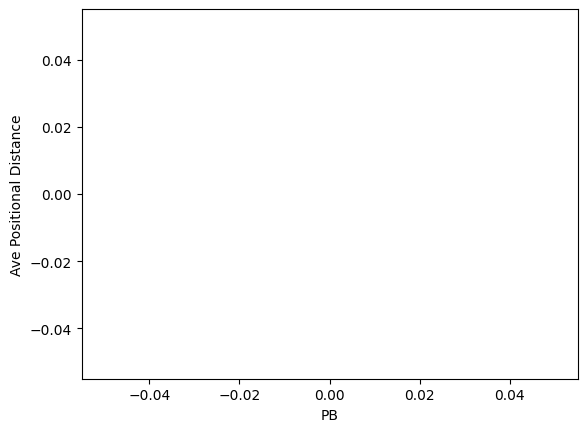

In [ ]:
df_pos_noise = pd.DataFrame(list(zip(pb_arr, posn_arr)), columns=['PB', 'Ave Positional Distance'])

sns.lineplot(df_pos_noise, x="PB", y="Ave Positional Distance")